In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

### Exploratory Data Analysis

- Data is read in from file system storage
- Data is analysed by month, quarter and year from 2018 t0 2022

#### Data Preparation [cleaning and processing]
| Action                         | Description                             |
|--------------------------------|-----------------------------------------|
| Renaming columns               | ----                                    |
| Formatting data                | Ex: converting string date to date type |
| Identifying duplicated columns | ----                                    |
| Dropping irrelevant columns    | ------                                  |
| Feature selection              | -------                                 |
| Data visualisations            | ------                                  |

----------------------------------------------------------------------------------------------


In [14]:
## Read in January 2022 data from filesystem
df_flights_012022 = pd.read_csv("../../data/eda/flights/flight_data_012022/flight_data_012022.zip", low_memory=False)
df_flights_012022.shape

(563737, 120)

In [15]:
df_flights_012022.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [16]:
# Drop irrelevant columns
SELECTED_COLUMNS = [
    # 'Year',
    # 'Quarter',
    # 'Month',
    # 'DayofMonth',
    # 'DayOfWeek',
    'FlightDate',
    # 'Marketing_Airline_Network',
    # 'Operated_or_Branded_Code_Share_Partners',
    # 'DOT_ID_Marketing_Airline',
    # 'IATA_Code_Marketing_Airline',
    # 'Flight_Number_Marketing_Airline',
    # 'Originally_Scheduled_Code_Share_Airline',
    # 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
    # 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
    # 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
    'Operating_Airline',
    # 'DOT_ID_Operating_Airline',
    # 'IATA_Code_Operating_Airline',
    # 'Tail_Number',
    # 'Flight_Number_Operating_Airline',
    'OriginAirportID',
    # 'OriginAirportSeqID',
    # 'OriginCityMarketID',
    'Origin',
    'OriginCityName',
    'OriginState',
    # 'OriginStateFips',
    # 'OriginStateName',
    # 'OriginWac',
    'DestAirportID',
    # 'DestAirportSeqID',
    # 'DestCityMarketID',
    'Dest',
    'DestCityName',
    'DestState',
    # 'DestStateFips',
    'DestStateName',
    # 'DestWac',
    'CRSDepTime',
    'DepTime',
    'DepDelay',
    'DepDelayMinutes',
    'DepDel15',
    'DepartureDelayGroups',
    'DepTimeBlk',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
    'ArrTime',
    'ArrDelay',
    'ArrDelayMinutes',
    'ArrDel15',
    'ArrivalDelayGroups',
    'ArrTimeBlk',
    'Cancelled',
    'CancellationCode',
    'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'DistanceGroup',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'FirstDepTime',
    'TotalAddGTime',
    'LongestAddGTime',
    # 'DivAirportLandings',
    # 'DivReachedDest',
    # 'DivActualElapsedTime',
    # 'DivArrDelay',
    # 'DivDistance',
    # 'Div1Airport',
    # 'Div1AirportID',
    # 'Div1AirportSeqID',
    # 'Div1WheelsOn',
    # 'Div1TotalGTime',
    # 'Div1LongestGTime',
    # 'Div1WheelsOff',
    # 'Div1TailNum',
    # 'Div2Airport',
    # 'Div2AirportID',
    # 'Div2AirportSeqID',
    # 'Div2WheelsOn',
    # 'Div2TotalGTime',
    # 'Div2LongestGTime',
    # 'Div2WheelsOff',
    # 'Div2TailNum',
    # 'Div3Airport',
    # 'Div3AirportID',
    # 'Div3AirportSeqID',
    # 'Div3WheelsOn',
    # 'Div3TotalGTime',
    # 'Div3LongestGTime',
    # 'Div3WheelsOff',
    # 'Div3TailNum',
    # 'Div4Airport',
    # 'Div4AirportID',
    # 'Div4AirportSeqID',
    # 'Div4WheelsOn',
    # 'Div4TotalGTime',
    # 'Div4LongestGTime',
    # 'Div4WheelsOff',
    # 'Div4TailNum',
    # 'Div5Airport',
    # 'Div5AirportID',
    # 'Div5AirportSeqID',
    # 'Div5WheelsOn',
    # 'Div5TotalGTime',
    # 'Div5LongestGTime',
    # 'Div5WheelsOff',
    # 'Div5TailNum',
    # 'Duplicate',
    # 'Unnamed: 119'
]

In [17]:
## Read in June 2022 data from filesystem
df_flights_062022 = pd.read_csv("../../data/eda/flights/flight_data_062022/flight_data_062022.zip", low_memory=False)
df_flights_062022= df_flights_062022.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
df_flights_062022.shape

(602057, 120)

In [18]:
df_flights_062022 = df_flights_062022[SELECTED_COLUMNS].copy()
df_flights_062022.columns.to_list()

['FlightDate',
 'Operating_Airline',
 'OriginAirportID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'DestAirportID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateName',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 'LongestAddGTime']

In [19]:
## Read in August 2022 data from filesystem
df_flights_082022 = pd.read_csv("../../data/eda/flights/flight_data_082022/flight_data_082022.zip", low_memory=False)
df_flights_082022.shape

(613649, 120)

In [20]:
## Read in 2022 data from filesystem
df_flights_2022 = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip", low_memory=False)
df_flights_2022.shape

(1779443, 121)

In [21]:
## Read in 2018-2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_2018_2022/flight_data_2018_2022.csv.zip", low_memory=False)
df_flights.shape

(1779443, 122)

In [29]:
## clean the data by removing spaces
df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
## Format column data from [0,1] -> boolean
df_flights["Cancelled"] = df_flights["Cancelled"].astype("bool")
## Converting dataTypes
df_flights["FlightDate"] = pd.to_datetime(df_flights["FlightDate"])
df_flights["FlightDate"].head() 

0   2022-01-06
1   2022-01-06
2   2022-01-06
3   2022-01-06
4   2022-01-06
Name: FlightDate, dtype: datetime64[ns]

In [30]:
df_flights.memory_usage().sum()

642379051

In [31]:
df_flights = df_flights[SELECTED_COLUMNS].copy()

In [32]:
df_flights.memory_usage().sum()

642379051

In [33]:
642379051 / 1724280395

0.37254906618595524

In [34]:
df_flights.head()

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,...,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,...,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,...,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,...,680.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,...,341.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_flights.dtypes

FlightDate              datetime64[ns]
Operating_Airline               object
OriginAirportID                  int64
Origin                          object
OriginCityName                  object
OriginState                     object
DestAirportID                    int64
Dest                            object
DestCityName                    object
DestState                       object
DestStateName                   object
CRSDepTime                       int64
DepTime                        float64
DepDelay                       float64
DepDelayMinutes                float64
DepDel15                       float64
DepartureDelayGroups           float64
DepTimeBlk                      object
TaxiOut                        float64
WheelsOff                      float64
WheelsOn                       float64
TaxiIn                         float64
CRSArrTime                       int64
ArrTime                        float64
ArrDelay                       float64
ArrDelayMinutes          

##### Understanding the data

In [36]:
df_flights.columns.to_list()

['FlightDate',
 'Operating_Airline',
 'OriginAirportID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'DestAirportID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateName',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 'LongestAddGTime']

In [37]:
df_flights.dtypes

FlightDate              datetime64[ns]
Operating_Airline               object
OriginAirportID                  int64
Origin                          object
OriginCityName                  object
OriginState                     object
DestAirportID                    int64
Dest                            object
DestCityName                    object
DestState                       object
DestStateName                   object
CRSDepTime                       int64
DepTime                        float64
DepDelay                       float64
DepDelayMinutes                float64
DepDel15                       float64
DepartureDelayGroups           float64
DepTimeBlk                      object
TaxiOut                        float64
WheelsOff                      float64
WheelsOn                       float64
TaxiIn                         float64
CRSArrTime                       int64
ArrTime                        float64
ArrDelay                       float64
ArrDelayMinutes          

In [38]:
df_flights.shape

(1779443, 46)

In [39]:
df_flights.tail()

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
1779438,2022-08-10,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,0.0,0.0,0.0,0.0,54.0,NaN,NaN,NaN
1779439,2022-08-16,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779440,2022-08-17,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,0.0,0.0,0.0,0.0,28.0,NaN,NaN,NaN
1779441,2022-08-18,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779442,2022-08-19,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_flights.describe()

,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
count,1.779443e+06,1.779443e+06,1.779443e+06,1.711477e+06,1.711452e+06,1.711452e+06,1.711452e+06,1.711452e+06,1.710067e+06,1.710067e+06,...,1.779443e+06,1.779443e+06,374132.000000,374132.000000,374132.000000,374132.000000,374132.000000,12148.000000,12148.000000,12148.000000
mean,1.265515e+04,1.265508e+04,1.332487e+03,1.336607e+03,1.365804e+01,1.666825e+01,2.242856e-01,2.467034e-01,1.702023e+01,1.358015e+03,...,7.952382e+02,3.651882e+00,28.193849,4.304932,11.512084,0.153141,25.542918,1369.281116,45.536878,44.550955
std,1.523551e+03,1.523547e+03,4.921649e+02,5.083030e+02,5.494543e+01,5.390303e+01,4.171111e-01,2.403060e+00,9.718800e+00,5.107383e+02,...,5.936299e+02,2.330581e+00,77.275369,31.587205,31.980698,4.117464,54.217227,493.925456,41.683290,39.995099
min,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,...,3.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.129200e+04,1.129200e+04,9.150000e+02,9.180000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.100000e+01,9.320000e+02,...,3.640000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,936.000000,18.000000,18.000000
50%,1.288900e+04,1.288900e+04,1.322000e+03,1.325000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.500000e+01,1.338000e+03,...,6.390000e+02,3.000000e+00,8.000000,0.000000,0.000000,0.000000,0.000000,1434.000000,31.000000,31.000000
75%,1.400400e+04,1.398300e+04,1.737000e+03,1.747000e+03,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,1.900000e+01,1.801000e+03,...,1.027000e+03,5.000000e+00,27.000000,0.000000,14.000000,0.000000,30.000000,1740.000000,57.000000,56.000000
max,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,5.995000e+03,5.995000e+03,1.000000e+00,1.200000e+01,2.210000e+02,2.400000e+03,...,5.095000e+03,1.100000e+01,5986.000000,1665.000000,1522.000000,1245.000000,2098.000000,2400.000000,376.000000,341.000000


In [41]:
df_flights.columns.to_list()

['FlightDate',
 'Operating_Airline',
 'OriginAirportID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'DestAirportID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateName',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 'LongestAddGTime']

#### Delays by Airline in 2022

In [42]:
airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
airlines = pd.read_csv(airline_csv)
## save locally
#airlines.to_csv("airlines.csv") 
airlines.query("Code == '9E'")
#airlines
airline_mapper = airlines.set_index("Code")["Description"]


In [43]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts.head()

WN    327327
DL    224523
AA    222706
OO    192876
UA    153764
Name: Operating_Airline, dtype: int64

In [52]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts
airline_counts.index=airline_counts.index.map(
    airlines.set_index('Code')['Description']
    ).rename("Airline")
airline_counts.head()

Airline
Southwest Airlines Co.    327327
Delta Air Lines Inc.      224523
American Airlines Inc.    222706
SkyWest Airlines Inc.     192876
United Air Lines Inc.     153764
Name: Operating_Airline, dtype: int64

<AxesSubplot: ylabel='Airline'>

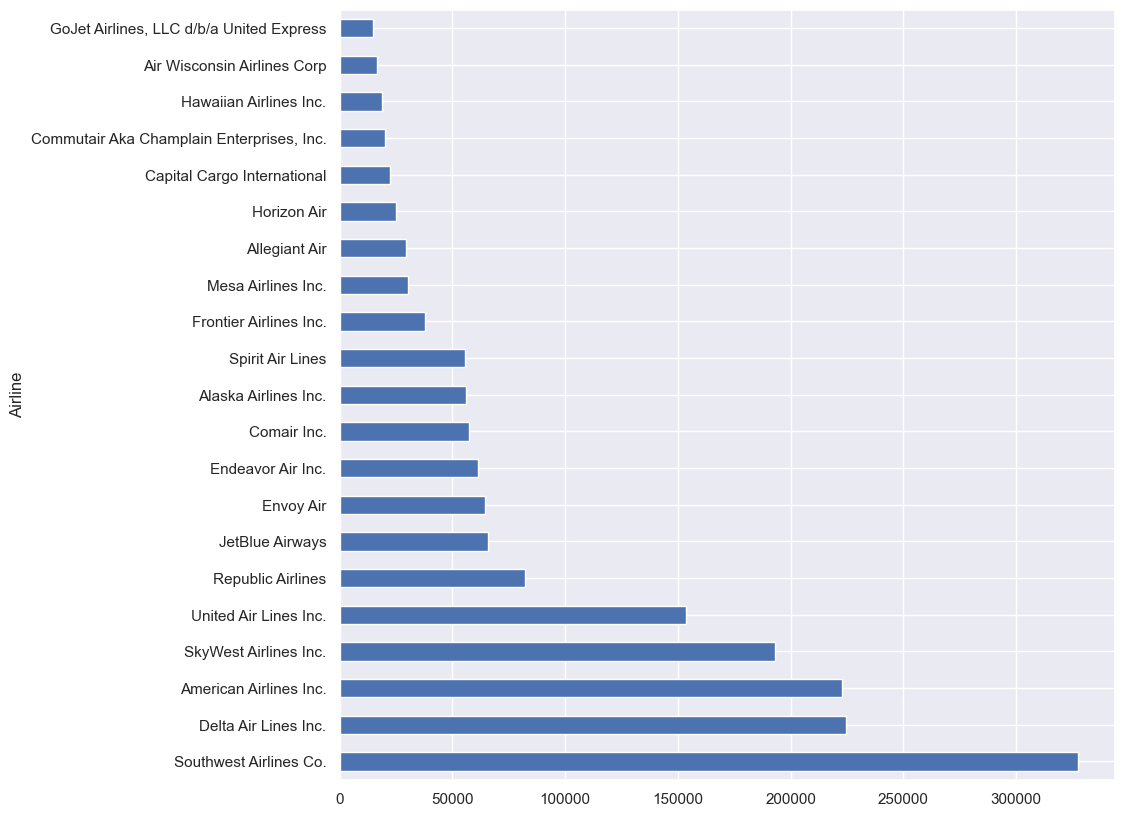

In [45]:
airline_counts.plot(kind='barh', figsize=(10,10))

<AxesSubplot: ylabel='Airline'>

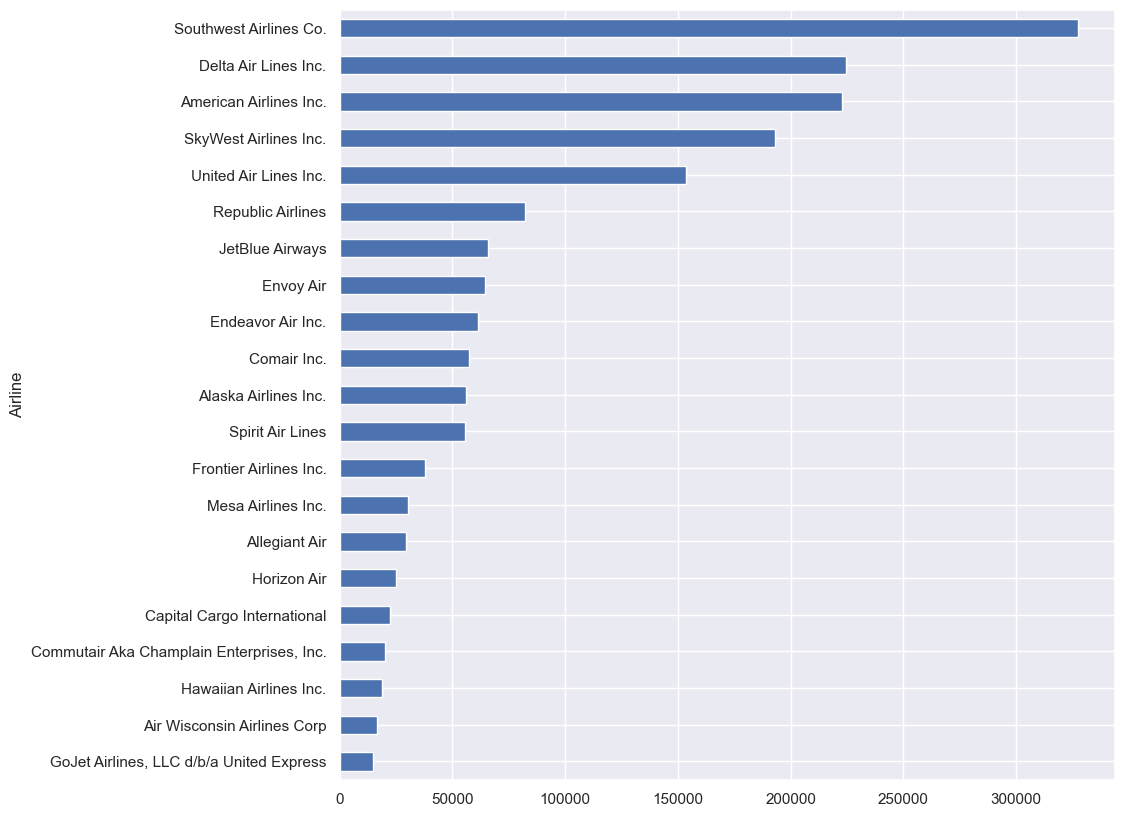

In [53]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [49]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
Airline,
"GoJet Airlines, LLC d/b/a United Express",14975
Air Wisconsin Airlines Corp,16794
Hawaiian Airlines Inc.,18668
"Commutair Aka Champlain Enterprises, Inc.",20265
Capital Cargo International,22426
Horizon Air,25127
Allegiant Air,29506
Mesa Airlines Inc.,30171
Frontier Airlines Inc.,37806


In [54]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Operating_Airline<br>value=%{x}<br>Airline=%{y}<extra></extra>',
              'legendgroup': 'Operating_Airline',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Operating_Airline',
              'offsetgroup': 'Operating_Airline',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 14975,  16794,  18668,  20265,  22426,  25127,  29506,  30171,  37806,
                           55690,  55980,  57212,  61431,  64375,  65755,  82066, 153764, 192876,
                          222706, 224523, 327327], dtype=int64),
              'xaxis': 'x',
              'y': array(['GoJet Airlines, LLC d/b/a United Express',
                          'Air Wisconsin Airlines Corp', 'Hawaiian Airlines Inc.',
                          'Commutair Aka Champlain Enterprises, Inc.',
                          'Capital Cargo International', 'Horizon Air', 'Allegiant Air',
                          'Mesa Airlines Inc.', 'Frontier Airlines Inc.', 'Spirit Air Lines',
                          'Alaska Airlines Inc.', 'Comair Inc.', 'Endeavor Air Inc.', 'Envoy Air',
                          'JetBlue Airways', 'Republic Airlines', 'United Air Lines Inc.',
                          'SkyWest Airlines Inc.', 'American Airlines Inc.',
                          'Delta Air Lines Inc.', 'Southwest Airlines Co.'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 700,
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Flights per airline'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Airline'}}}
})

In [55]:
pct_cancelled = df_flights["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.04% of flights are cancelled


0.03912628839473925

In [ ]:
df_flights["Cancelled"].value_counts()

False    1709820
True       69623
Name: Cancelled, dtype: int64

### Cancelled flights, group by Year

In [68]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby([df_flights["FlightDate"].dt.year])["Cancelled"].agg("mean").to_frame()

,Cancelled
FlightDate,
2022,0.039126


In [69]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby([df_flights["FlightDate"].dt.year])["Cancelled"].agg("mean").to_frame()

,Cancelled
FlightDate,
2022,0.039126


In [82]:
df_flights.query('20220101 < FlightDate < 20221231')  # flights in 2022

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,...,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,...,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,...,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,...,680.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,...,341.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779438,2022-08-10,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,0.0,0.0,0.0,0.0,54.0,NaN,NaN,NaN
1779439,2022-08-16,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779440,2022-08-17,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,0.0,0.0,0.0,0.0,28.0,NaN,NaN,NaN
1779441,2022-08-18,OH,13577,MYR,"Myrtle Beach, SC",SC,14100,PHL,"Philadelphia, PA",PA,...,473.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
cancelled_flights_analysis = (
    (df_flights.query("20220101 <FlightDate < 20221231")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(airline_mapper)


In [76]:
cancelled_flights_analysis.head()     ## TODO: add geographical information of flight, weather information

,Operating_Airline,Departed,Cancelled,Total,Pct_Cancelled,Airline
0,9E,57218,3737,60955,6.130752,Endeavor Air Inc.
1,AA,209970,10790,220760,4.887661,American Airlines Inc.
2,AS,53982,1492,55474,2.689548,Alaska Airlines Inc.
3,B6,61781,3275,65056,5.034124,JetBlue Airways
4,C5,19306,732,20038,3.653059,"Commutair Aka Champlain Enterprises, Inc."


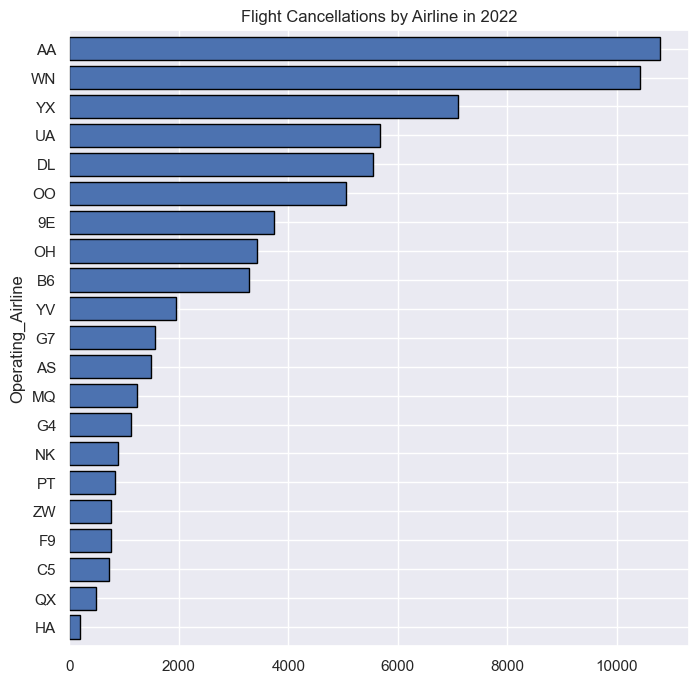

In [77]:
cancelled_flights_analysis.set_index("Operating_Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   figsize=(8, 8), 
                                   width=.8,
                                   edgecolor="black",
                                   title="Flight Cancellations by Airline in 2022")
plt.show()

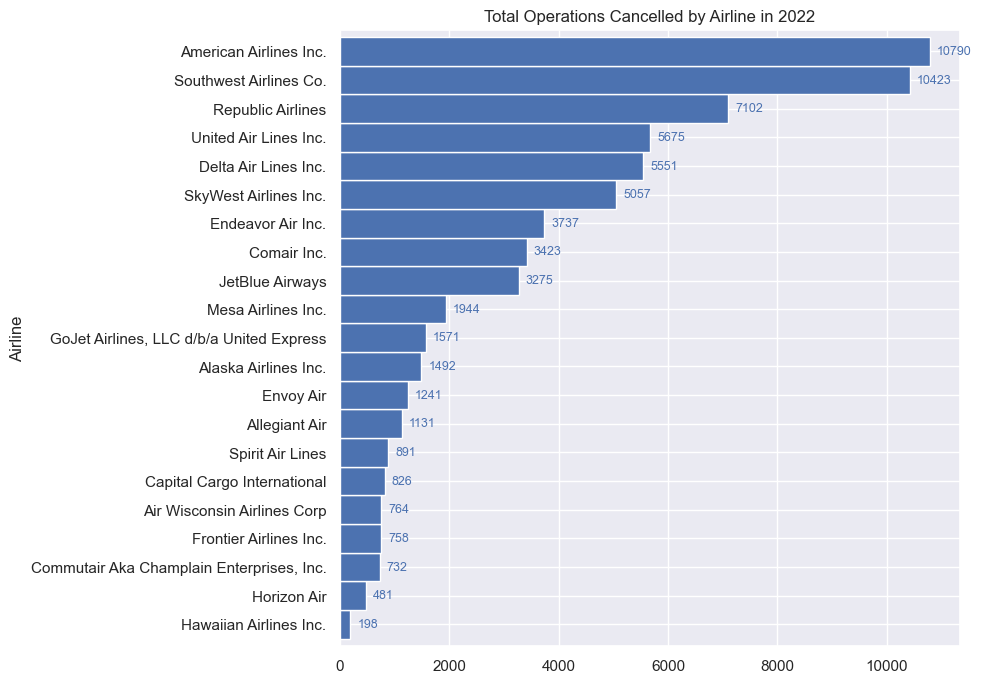

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
# cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
#     airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   title="Total Operations Cancelled by Airline in 2022",
                                   width=1
                                   )

ax.bar_label(ax.containers[0], padding=5, fontsize=9, color='b')
plt.show()


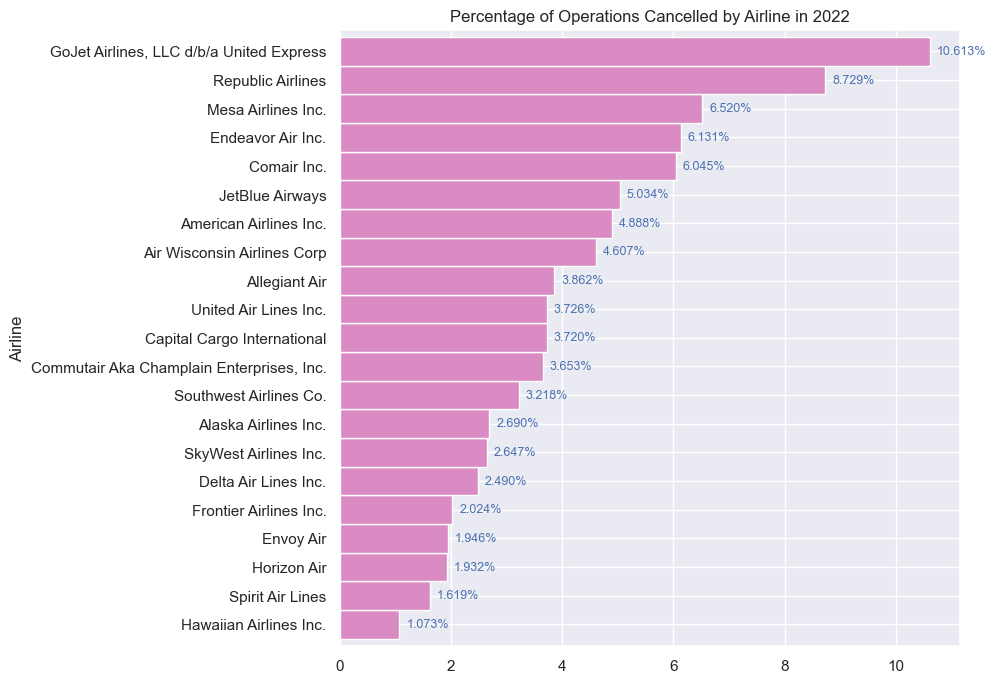

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
    airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[6]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()

In [83]:
cancel_count = df_flights.query('20220101 < FlightDate < 20221231').query("Cancelled")["Operating_Airline"].value_counts()
cancel_count

AA    10790
WN    10423
YX     7102
UA     5675
DL     5551
OO     5057
9E     3737
OH     3423
B6     3275
YV     1944
G7     1571
AS     1492
MQ     1241
G4     1131
NK      891
PT      826
ZW      764
F9      758
C5      732
QX      481
HA      198
Name: Operating_Airline, dtype: int64

In [ ]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Analysis for January - June 2022

In [ ]:
df_flights["Month"].value_counts()

8    613649
6    602057
1    563737
Name: Month, dtype: int64

In [ ]:
df_flights["Quarter"].value_counts()

3    613649
2    602057
1    563737
Name: Quarter, dtype: int64

In [ ]:
df_flights["FlightDate"].value_counts()

2022-06-17    20841
2022-06-23    20832
2022-06-24    20800
2022-06-20    20794
2022-06-16    20789
              ...  
2022-01-01    16684
2022-01-08    16031
2022-01-29    15644
2022-01-22    15625
2022-01-15    15483
Name: FlightDate, Length: 92, dtype: int64

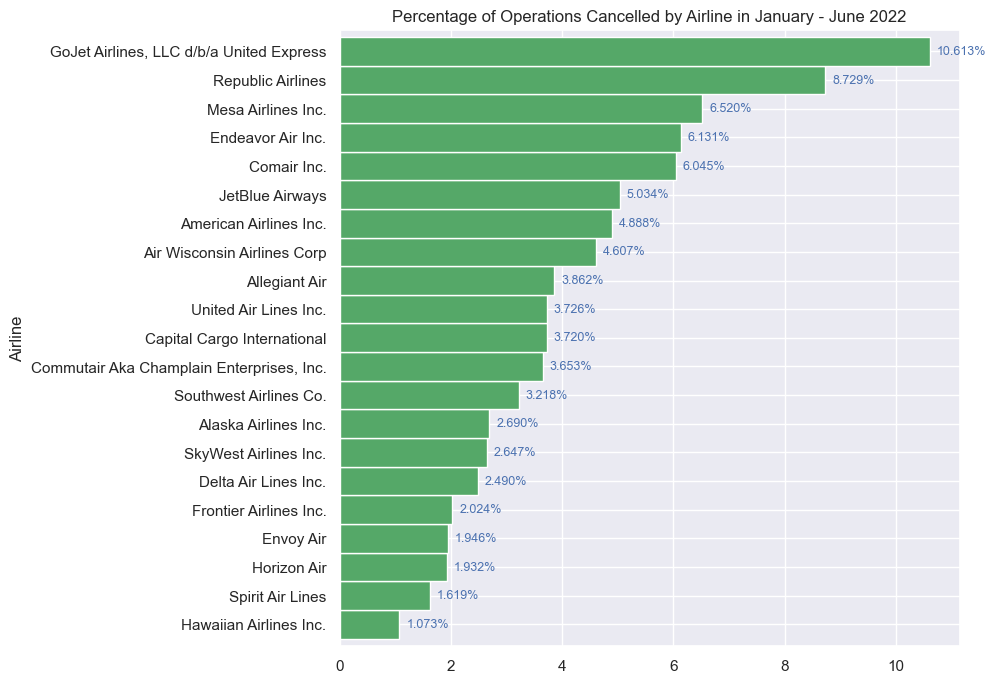

In [85]:
cancelled_flights_analysis = (
    (df_flights.query("20220101 < FlightDate < 20221231")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(airline_mapper)

fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
    airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in January - June 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[2]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()